In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Analytics RAW - Insights para Motoristas Uber

Análise exploratória dos dados brutos focada em **decisões estratégicas para motoristas**, identificando:
- Melhores horários para trabalhar
- Locais com maior demanda
- Rotas mais lucrativas
- Padrões de cancelamento

In [30]:
import os

csv_path = 'ncr_ride_bookings.csv'
if not os.path.exists(csv_path):
    csv_path = os.path.join('..', '..', 'Data Layer', 'raw', 'ncr_ride_bookings.csv')

df = pd.read_csv(csv_path)

print(f"📊 Dataset: {len(df):,} registros | {len(df.columns)} colunas")
df.head()

📊 Dataset: 150,000 registros | 21 colunas


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


## 📋 Qualidade dos Dados

In [ ]:
print(f"Registros: {len(df):,}")
print(f"Colunas: {df.columns.tolist()}")
print(f"🔍 Duplicados: {df.duplicated(subset='Booking ID').sum():,}")
print(f"⚠️  Valores nulos: {df.isnull().sum().sum():,}")

df.info()

📊 Registros: 150,000
📋 Colunas: ['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method']
🔍 Duplicados: 1,233
⚠️  Valores nulos: 1,123,500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer I

In [32]:
# Configurações visuais
sns.set(style="whitegrid", palette="husl")

## 🚀 Preparação dos Dados

In [33]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()

completed = df[df['Booking Status'] == 'Completed']
cancelled = df[df['Booking Status'].str.contains('Cancel', na=False)]

print(f"✅ Completadas: {len(completed):,} ({len(completed)/len(df)*100:.1f}%)")
print(f"❌ Canceladas: {len(cancelled):,} ({len(cancelled)/len(df)*100:.1f}%)")

/tmp/ipykernel_41056/2916589359.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



✅ Completadas: 93,000 (62.0%)
❌ Canceladas: 37,500 (25.0%)


## 🕐 Melhores Horários para Trabalhar

**Insight**: Picos às **10h** e **18h** - horários ideais para maximizar corridas.

/tmp/ipykernel_41056/3232850755.py:22: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/tmp/ipykernel_41056/3232850755.py:22: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

/home/marcos/Documentos/uber-analytics/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

/home/marcos/Documentos/uber-analytics/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



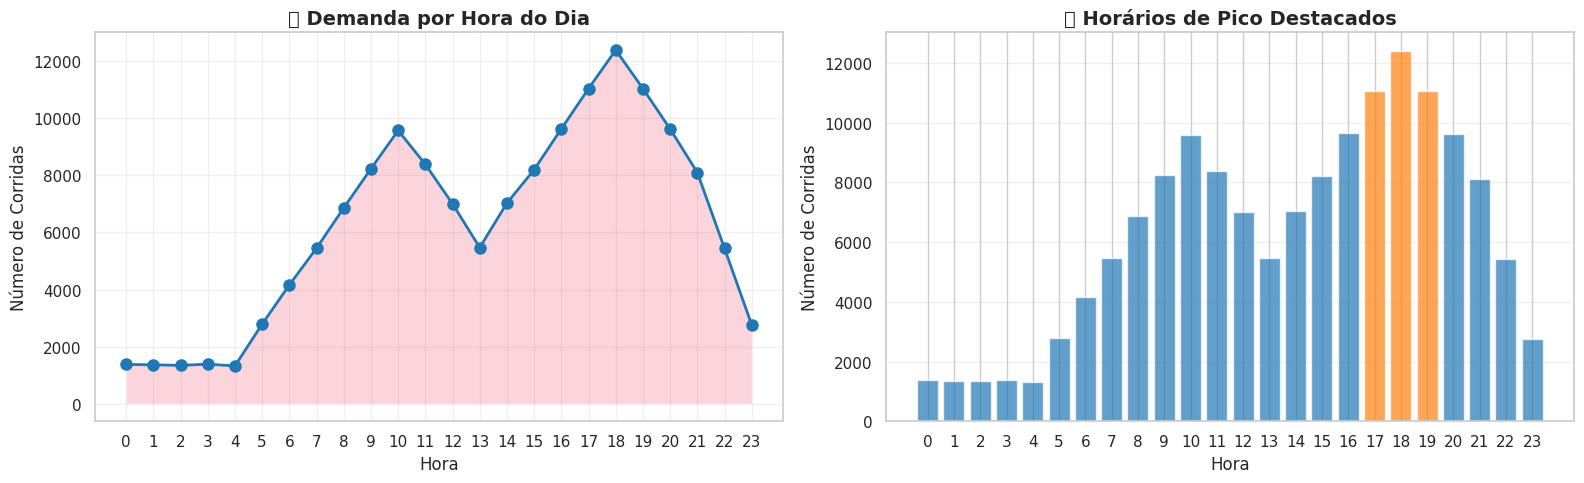


🔥 TOP 3 HORÁRIOS DE PICO:
   • 18h: 12,397 corridas
   • 19h: 11,047 corridas
   • 17h: 11,044 corridas


In [34]:
hourly_bookings = df['Hour'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.plot(hourly_bookings.index, hourly_bookings.values, marker='o', linewidth=2, markersize=8, color='#1f77b4')
ax1.fill_between(hourly_bookings.index, hourly_bookings.values, alpha=0.3)
ax1.set_title('📈 Demanda por Hora do Dia', fontsize=14, fontweight='bold')
ax1.set_xlabel('Hora')
ax1.set_ylabel('Número de Corridas')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(0, 24))

peak_hours = hourly_bookings.nlargest(3)
colors = ['#ff7f0e' if hour in peak_hours.index else '#1f77b4' for hour in hourly_bookings.index]
ax2.bar(hourly_bookings.index, hourly_bookings.values, color=colors, alpha=0.7)
ax2.set_title('🔥 Horários de Pico Destacados', fontsize=14, fontweight='bold')
ax2.set_xlabel('Hora')
ax2.set_ylabel('Número de Corridas')
ax2.set_xticks(range(0, 24))
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n🔥 TOP 3 HORÁRIOS DE PICO:")
for hour, count in peak_hours.items():
    print(f"   • {hour:02d}h: {count:,} corridas")

## 📍 Locais Estratégicos com Maior Demanda

**Ação**: Posicione-se nestes locais para aumentar chances de corridas.

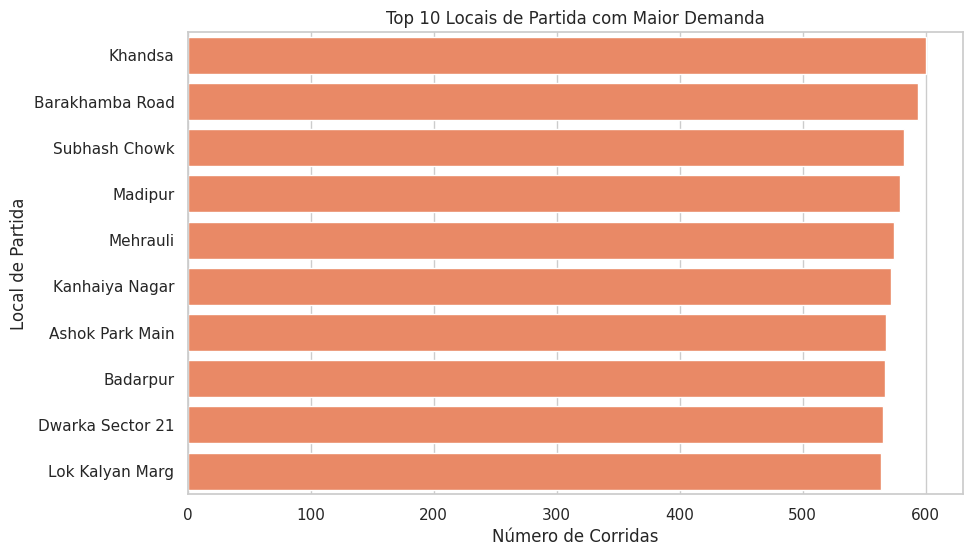

In [35]:
# === 3. Locais com maior número de partidas ===
plt.figure(figsize=(10,6))
top_pickups = completed['Pickup Location'].value_counts().head(10)
sns.barplot(x=top_pickups.values, y=top_pickups.index, color='coral')
plt.title('Top 10 Locais de Partida com Maior Demanda')
plt.xlabel('Número de Corridas')
plt.ylabel('Local de Partida')
plt.show()

## 💰 Análise de Valores - Corridas Premium

Existem 3.125 corridas premium (booking_value > R$87) que representam oportunidades de maior lucro

In [36]:
premium_rides = completed[completed['Booking Value'] > 1400]
print(f"📊 Corridas Premium (>1.400 INR / ~R$87):")
print(f"   Total: {len(premium_rides):,} corridas ({len(premium_rides)/len(completed)*100:.1f}%)")
print(f"   Valor médio: {premium_rides['Booking Value'].mean():.0f} INR (~R${premium_rides['Booking Value'].mean()*0.062:.0f})")
print(f"   Distância média: {premium_rides['Ride Distance'].mean():.1f} km")

📊 Corridas Premium (>1.400 INR / ~R$87):
   Total: 2,882 corridas (3.1%)
   Valor médio: 1898 INR (~R$118)
   Distância média: 26.2 km


## ❌ Taxa de Cancelamento

Atenção: ~38% das corridas não são completadas

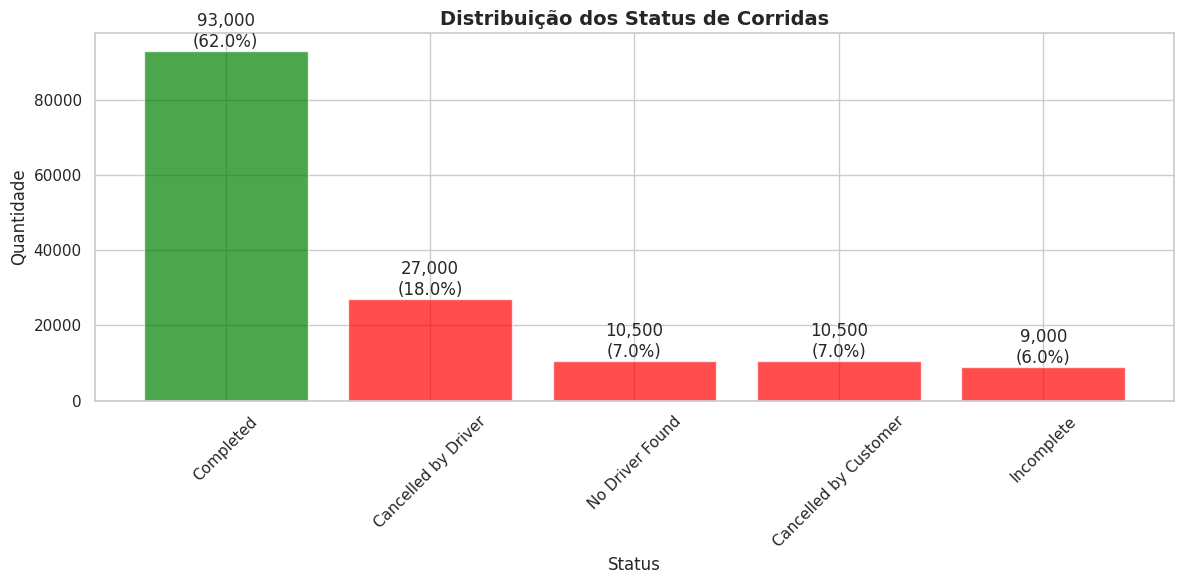

In [37]:
status_counts = df['Booking Status'].value_counts()

fig, ax = plt.subplots(figsize=(12,6))
colors = ['green' if x=='Completed' else 'red' for x in status_counts.index]
ax.bar(status_counts.index, status_counts.values, color=colors, alpha=0.7)
ax.set_title('Distribuição dos Status de Corridas', fontsize=14, fontweight='bold')
ax.set_xlabel('Status')
ax.set_ylabel('Quantidade')
ax.tick_params(axis='x', rotation=45)

for i, v in enumerate(status_counts.values):
    ax.text(i, v, f'{v:,}\n({v/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 🚗 Tipos de Veículo Mais Demandados

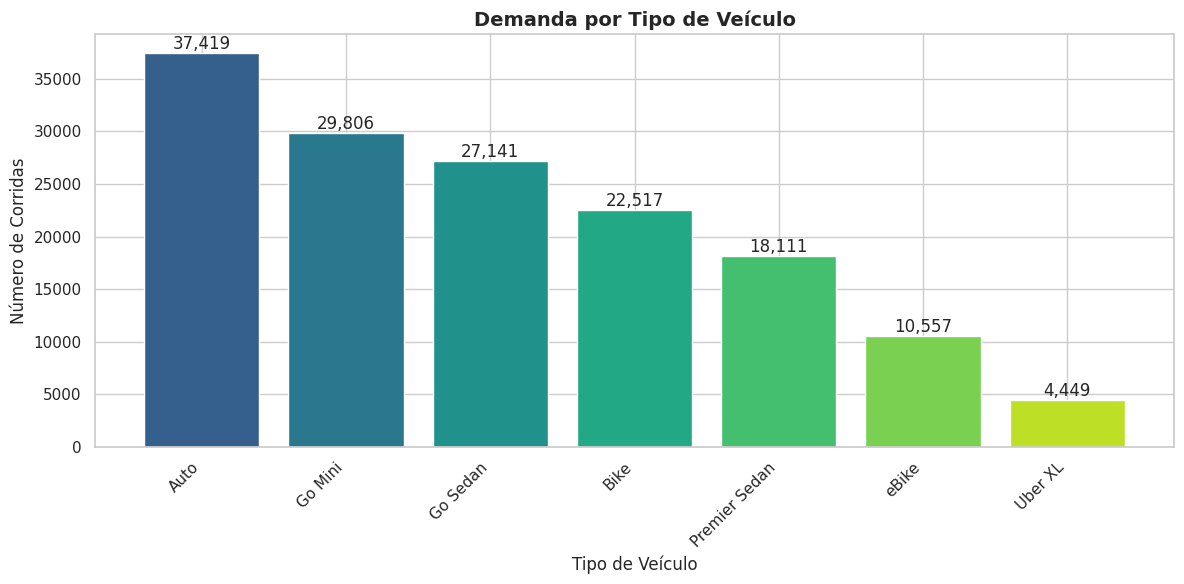

In [38]:
vehicle_counts = df['Vehicle Type'].value_counts()

plt.figure(figsize=(12,6))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(vehicle_counts)))
bars = plt.bar(vehicle_counts.index, vehicle_counts.values, color=colors)
plt.title('Demanda por Tipo de Veículo', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Número de Corridas')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 🛣️ Rotas Mais Lucrativas

/tmp/ipykernel_41056/3723989286.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



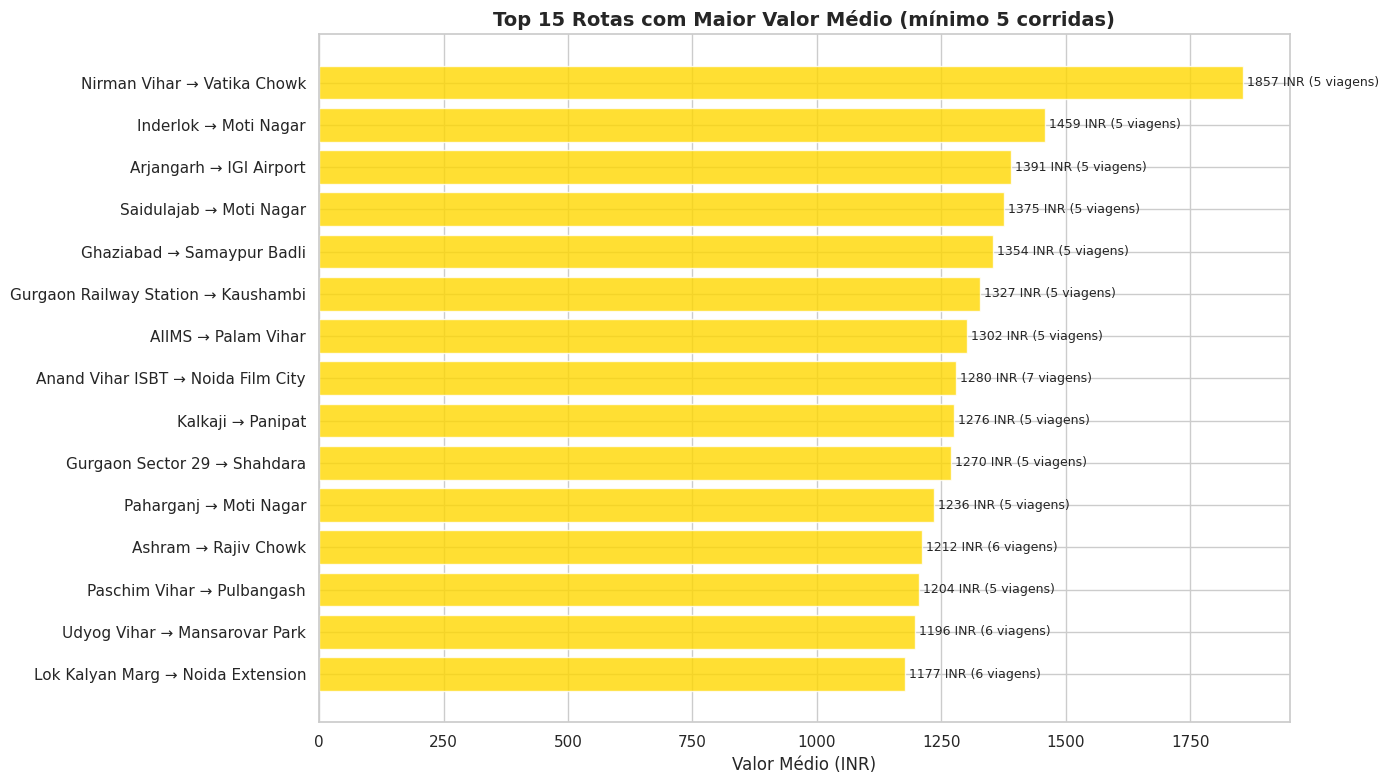

In [ ]:
completed['Route'] = completed['Pickup Location'] + ' → ' + completed['Drop Location']
route_analysis = completed.groupby('Route').agg({
    'Booking Value': ['count', 'mean']
}).reset_index()
route_analysis.columns = ['Route', 'Total_Rides', 'Avg_Value']
route_analysis = route_analysis[route_analysis['Total_Rides'] >= 5]
route_analysis = route_analysis.sort_values('Avg_Value', ascending=False).head(15)

plt.figure(figsize=(14,8))
bars = plt.barh(route_analysis['Route'], route_analysis['Avg_Value'], color='gold', alpha=0.8)
plt.xlabel('Valor Médio (INR)', fontsize=12)
plt.title('Top 15 Rotas com Maior Valor Médio (mínimo 5 corridas)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

for i, (val, count) in enumerate(zip(route_analysis['Avg_Value'], route_analysis['Total_Rides'])):
    plt.text(val, i, f' {val:.0f} INR ({int(count)} viagens)', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## ⏰ Horários de Pico por Localização

Identifique os melhores horários em cada região de alta demanda

/tmp/ipykernel_41056/122928432.py:27: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.

/home/marcos/Documentos/uber-analytics/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.



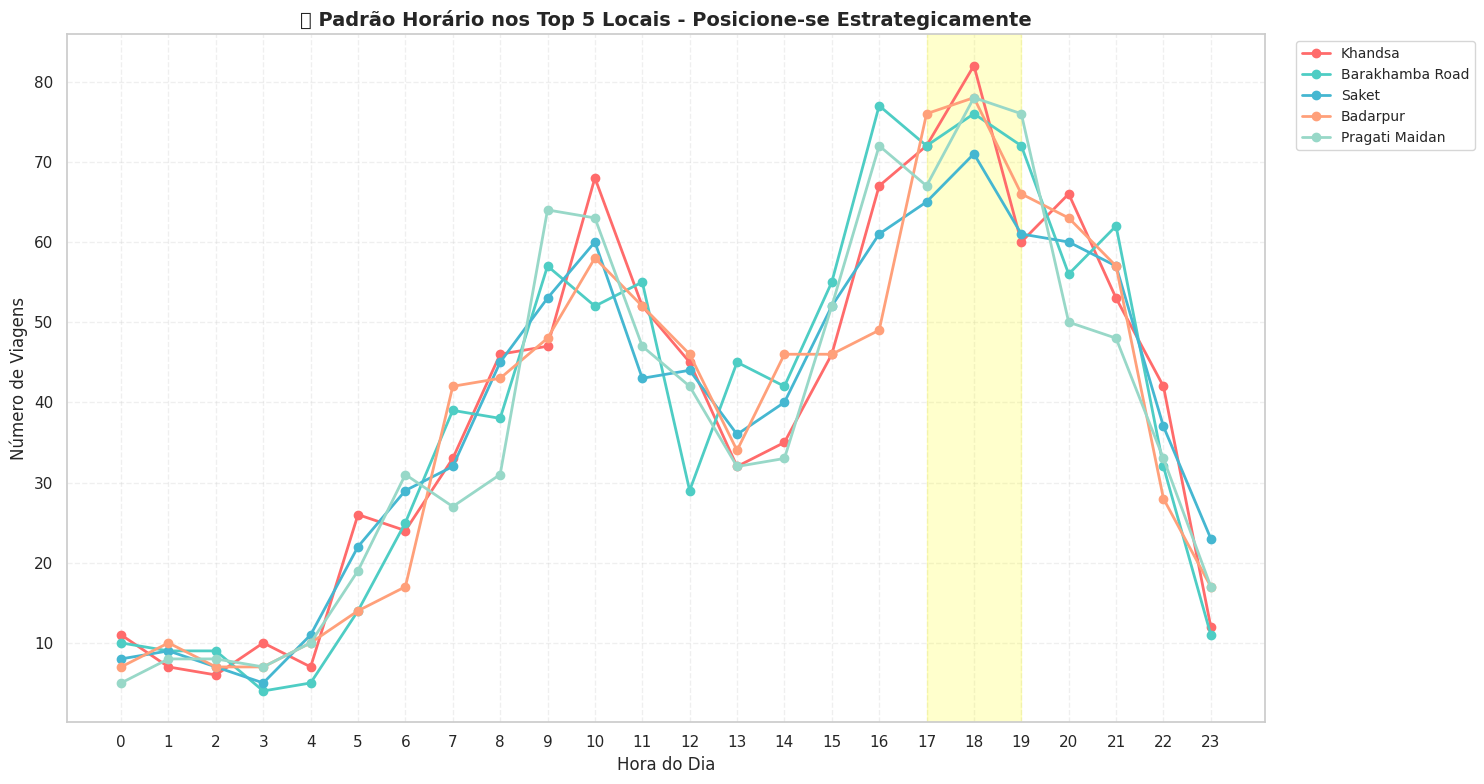

In [40]:
pickup_hour = df.groupby(['Pickup Location', 'Hour']).size().reset_index(name='Count')
top_pickup_locations = df['Pickup Location'].value_counts().head(5).index

plt.figure(figsize=(15, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

for idx, location in enumerate(top_pickup_locations):
    location_data = (
        pickup_hour[pickup_hour['Pickup Location'] == location]
        .set_index('Hour')
        .reindex(range(24), fill_value=0)
        .reset_index()
    )
    
    x = location_data['Hour'].to_numpy()
    y = location_data['Count'].to_numpy()
    
    plt.plot(x, y, marker='o', label=location, linewidth=2, color=colors[idx], markersize=6)

plt.title('🎯 Padrão Horário nos Top 5 Locais - Posicione-se Estrategicamente', fontsize=14, fontweight='bold')
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Número de Viagens', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(range(0, 24))
plt.axvspan(17, 19, alpha=0.2, color='yellow', label='Pico Vespertino')
plt.tight_layout()
plt.show()